# HEV genome comparisons within RESCRIPt

We'll use [RESCRIPt](https://github.com/bokulich-lab/RESCRIPt) and a [fork](https://github.com/mikerobeson/q2-sourmash/tree/use-fasta) of  [q2-sourmash](https://github.com/mikerobeson/q2-sourmash/), to perform a basic comparison of genomes.


In [1]:
import os
import qiime2 as q2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skbio
from q2_types.feature_data import DNAIterator, DNAFASTAFormat
from qiime2.plugins import rescript, sample_classifier as sc, diversity as q2d, sourmash as sour, emperor
import_data = q2.Artifact.import_data
%matplotlib inline

# Get Genomes

Grab *Hapatitis E Virus* available at: https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&Completeness_s=complete&VirusLineage_ss=Hepatitis%20E%20virus,%20taxid:12461


Remove data with few representatives, only looked at humans.

In [2]:
accessions = q2.Metadata.load('human-md.txt')

In [3]:
seqs, tax, = rescript.actions.get_ncbi_data(
    accession_ids=accessions,
    rank_propagation=False,
    n_jobs=4)

# Run Sourmash

In [4]:
minhash, = sour.actions.compute_fasta(sequence_file=seqs, ksizes=21, scaled=1000)

In [5]:
comparison, = sour.actions.compare(minhash, ksize=21)

# Diversity analysis and source prediction

In [6]:
pcs, = q2d.actions.pcoa(comparison)
pcplot, = emperor.actions.plot(pcs, metadata=accessions)
pcplot.save('emperor-plot.qzv')

/Users/mike/AnalysisSoftware/miniconda3/envs/qiime2-2020.8-test/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.06360644880390402 and the largest is 8.812219319111529.
  RuntimeWarning


'emperor-plot.qzv'

In [7]:
q2.Visualization.load('emperor-plot.qzv')

<visualization: Visualization uuid: 5b840440-9bcb-4afc-8855-db9633360210>

<Figure size 432x288 with 0 Axes>

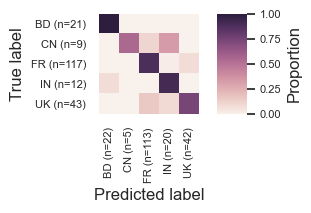

In [8]:
pred, accuracy, = sc.actions.classify_samples_from_dist(
    comparison, metadata=accessions.get_column('Geo_Location_Abbreviation'), k=3)

In [9]:
accuracy

<visualization: Visualization uuid: 606aba0b-f59d-4ebc-973c-7198fe8bc395>

In [10]:
accuracy.save('model_accuracy.qzv')

'model_accuracy.qzv'